# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [31]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy import stats

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [ ]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

In [6]:
clean_hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


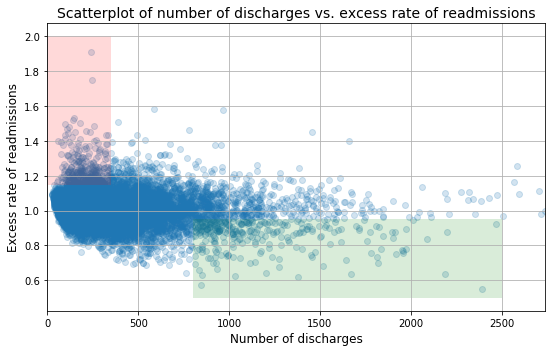

In [204]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function

x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [205]:
# Your turn

## A. The above analysis is based on nothing but a single inappropriate graphic and some arbitrarily chosen cutoffs which give different looking numbers. However, nothing is tied to any statistical significance. Thus, no recommendations sould be given at this point.

## B1. The graphic and analysis is suggesting a negative corrolation between excess readmission rate and a hospitals capacity which is not the same thing as its number of discharges. However, with no data on actual capacity, number of discharges will have to be assumed as having positive corrolation with capacity.

## The above graph gives a less biased view of the data x in log scale understood.  Assuming a linear relationship

# $Y=mX+b,$

## consider the hypotheses

# $H_o:m=0$

# $H_a:m\neq 0.$

In [206]:
slope, intercept, r, p, error = stats.linregress(x,y)
print('Linear Model: y = '+str(round(slope,5))+'x '+str(round(intercept,2)))
print('p-value = '+str(p))
print('Correlation = '+str(r))

Linear Model: y = -3e-05x 1.02
p-value = 1.502275642661509e-23
Correlation = -0.09309554287590441


## B2 and B3. If the correlation coefficient were closer to -1 then a strong negative linear correlation would suggest a strong linear model. Then the very small p-value would suggest a rejection of the null hypothesis. This would better justify the previous analysis. However, since the correlation coefficient is much closer to zero than -1, a linear model is not appropriate.


## Since excess readmission ratio is a ratio of predicted readmission to some expected readmission averaged over similar hospitals, the data could contain some bias based on how each hospital is determining their predicted readmissions. Moreover, hospitals which are less busy have an excess readmission ratio more easily altered by a small number of readmissions. Below is a scatter plot of the expected vs predicted readmission rates. This graph illustrates two distinct populations. Those with small or large expected readmission rates with a natural cutoff of 10 illustrated by the graph. Moreover, the graph below confirms the assertion that hospitals with smaller expected readmission rates are more adversely affected by a small number of readmitting patients based on the visual appearance of a larger slope in the data.

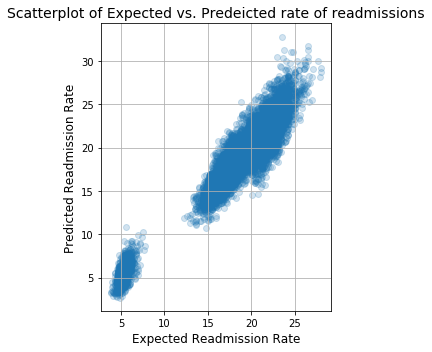

In [207]:
# Relating expected and predicted.
x = [a for a in clean_hospital_read_df['Expected Readmission Rate'][81:-5]]
y = list(clean_hospital_read_df['Predicted Readmission Rate'][81:-5])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.set_xlabel('Expected Readmission Rate', fontsize=12)
ax.set_ylabel('Predicted Readmission Rate', fontsize=12)
ax.set_title('Scatterplot of Expected vs. Predeicted rate of readmissions', fontsize=14)

ax.grid(True)
# With log scale on x, using same scale on both axes gives less biased depiction of relationship
plt.axis('scaled')
fig.tight_layout()

## B4 and B5. Next we look at these two populations separately. Both populations are large with the smaller of the two containing over 1300 hospitals. In both cases, rerunning the linear regression model gives correlation coefficients much farther from 0 but still on the small end near -3. Thus, separating these sub-populations does increase the practical significance in using the separate models to obtain generally similar conclusions to those made originally.

## However, in both cases, the small p-values suggest some negative correlation but the model slopes are still quite small and predcit that an increase of 1000 discharges per month would only decrease the number of readmissions between 1 and 2 patients per month. This is practically insignificant for such larger hospitals. 

## Based on this new analysis, the main recommendation would be to inform hospitals to which sub-population they belong so they are aware of how membership in either population may be having an effect on an the stability for predicted readmission rates. 

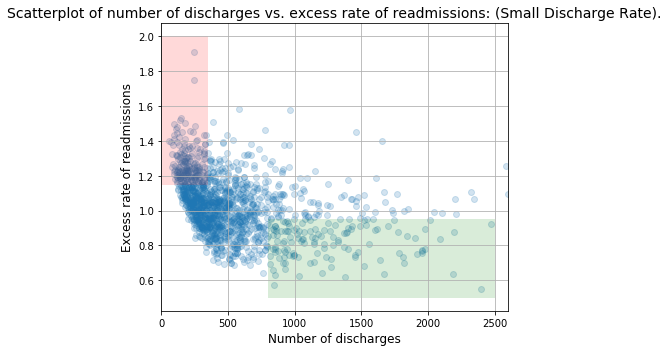

In [208]:
clean_small_exp_df=clean_hospital_read_df.loc[clean_hospital_read_df['Expected Readmission Rate']<=10]
x = [a for a in clean_small_exp_df['Number of Discharges'][:-3]]
y = list(clean_small_exp_df['Excess Readmission Ratio'][:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions: (Small Discharge Rate).', fontsize=14)

ax.grid(True)
fig.tight_layout()

In [209]:
slope, intercept, r, p, error = stats.linregress(x,y)
print('Linear Model: y = '+str(round(slope,5))+'x '+str(round(intercept,2)))
print('p-value = '+str(p))
print('Correlation = '+str(r))

Linear Model: y = -0.00016x 1.11
p-value = 4.319404611253568e-44
Correlation = -0.3638999457102065


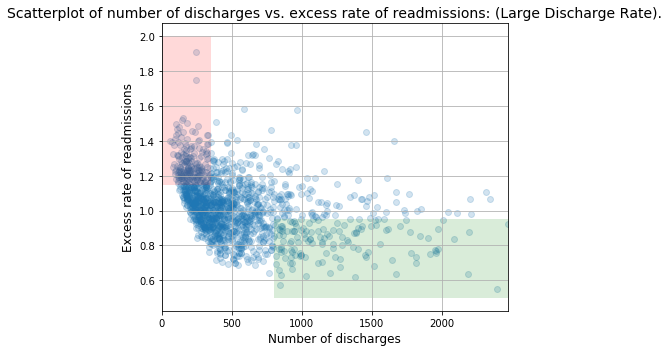

In [210]:
clean_big_exp_df=clean_hospital_read_df.loc[clean_hospital_read_df['Expected Readmission Rate']>10]
x = [a for a in clean_small_exp_df['Number of Discharges'][:-5]]
y = list(clean_small_exp_df['Excess Readmission Ratio'][:-5])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions: (Large Discharge Rate).', fontsize=14)

ax.grid(True)
fig.tight_layout()

In [211]:
slope, intercept, r, p, error = stats.linregress(x,y)
print('Linear Model: y = '+str(round(slope,5))+'x '+str(round(intercept,2)))
print('p-value = '+str(p))
print('Correlation = '+str(r))

Linear Model: y = -0.00017x 1.12
p-value = 8.222347264395566e-48
Correlation = -0.37865891244084204
